## Analysis of Popular Tiktok Songs

The sound paired with a Tiktok is a huge factor to it's success. Let's look into what makes a sound popular.

In [128]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

%matplotlib inline

plt.rcParams["figure.figsize"] = (20, 10)

saved_style_state = matplotlib.rcParams.copy()

In [52]:
filepath = 'tiktok-data/TikTok_songs_2022.csv'
tiktok_songs = pd.read_csv(filepath)
print("done")

done


In [53]:
tiktok_songs.columns

Index(['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop',
       'danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

<AxesSubplot:>

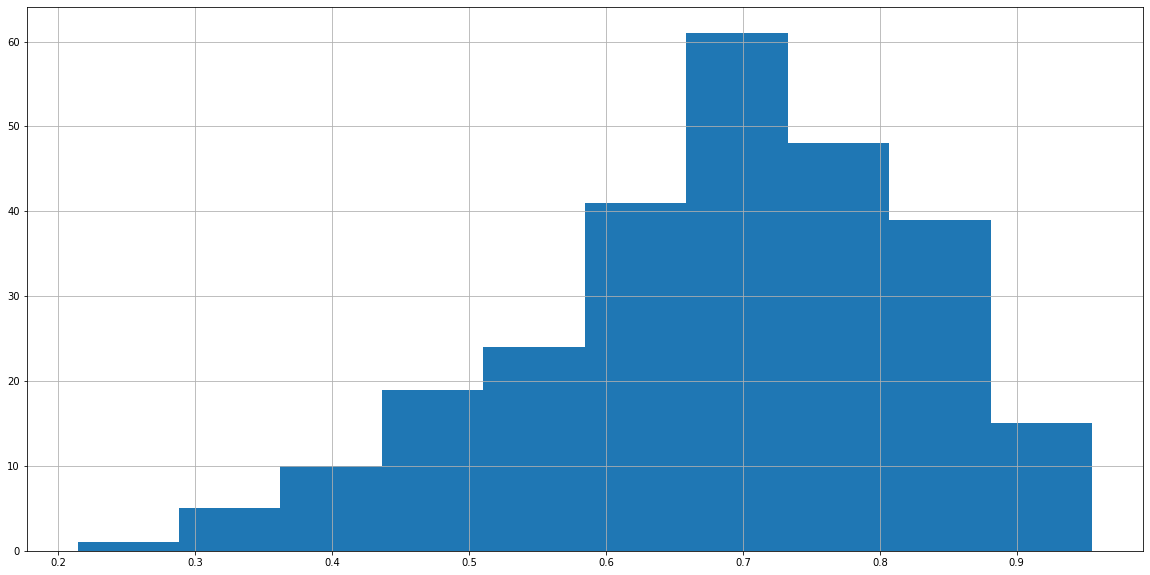

In [54]:
tiktok_songs.energy.hist()

array([[<AxesSubplot:xlabel='artist_pop', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='track_pop', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='danceability', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='energy', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='loudness', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='mode', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='key', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='speechiness', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='acousticness', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='liveness', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='valence', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='tempo', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='time_signature', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='duration_ms', ylabel='artist_pop'>],
       [<AxesSubplot:xlabel='artist_pop', ylabel='tra

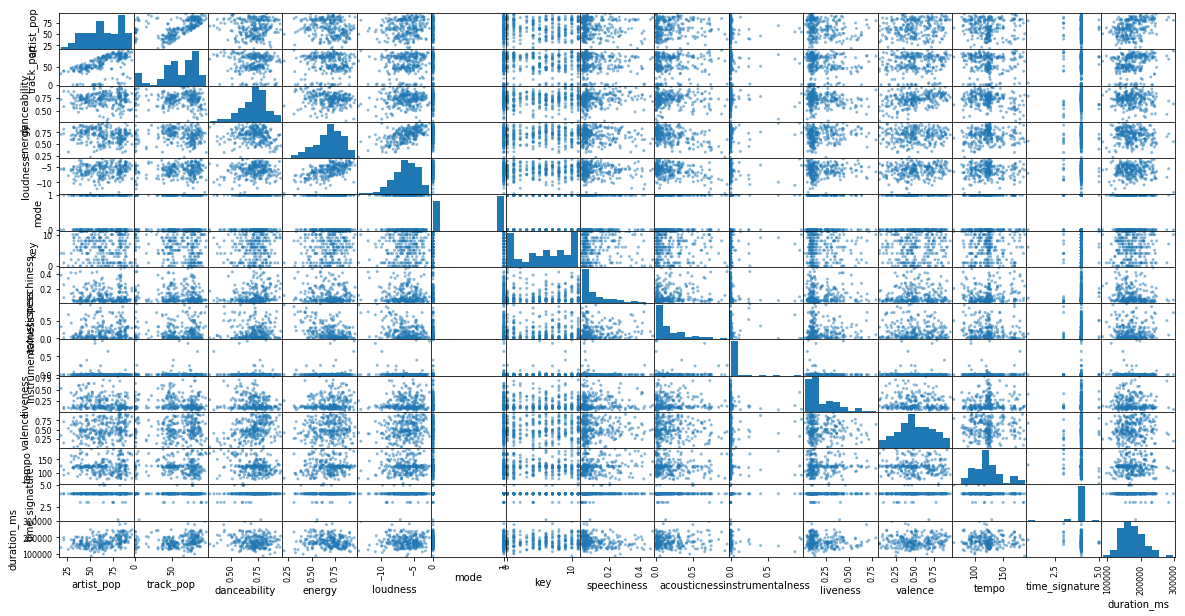

In [55]:
pd.plotting.scatter_matrix(tiktok_songs)

## Which artist should I pick? 🎤
- We notice that there is a direct positive correlation between artist and track popularity
- This indicates how viewers are likely to connect with popular artists they already know and hence tracks from these artists will perform better
- For examples ***

Text(0, 0.5, 'Track Popularity')

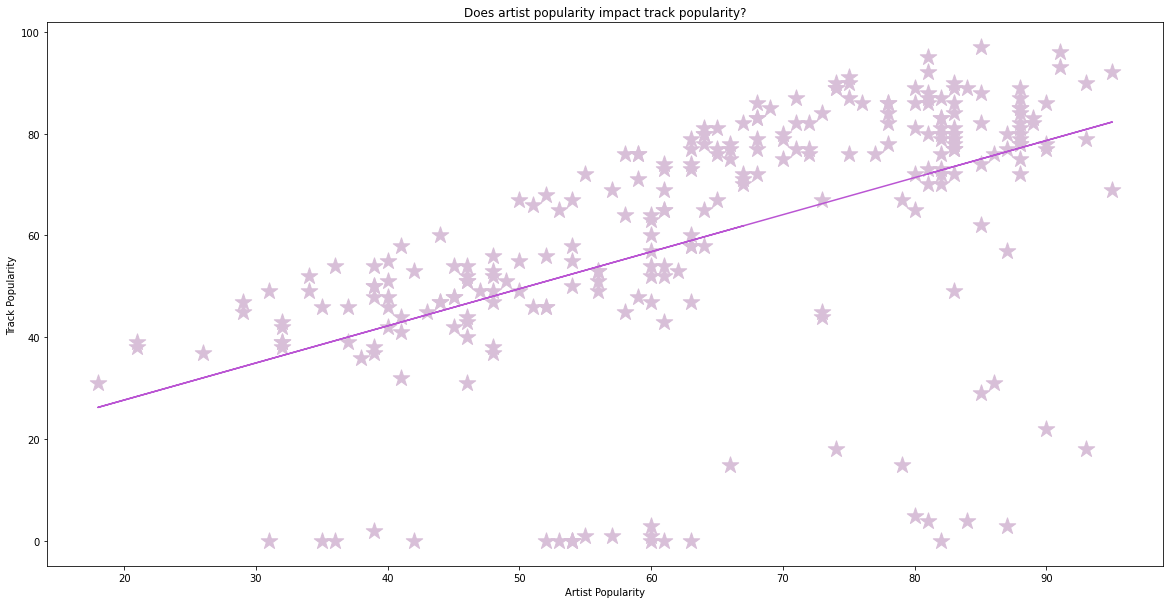

In [99]:
plt.scatter(tiktok_songs.artist_pop, tiktok_songs.track_pop, color='thistle',s=300, marker='*')
a, b = np.polyfit(tiktok_songs.artist_pop, tiktok_songs.track_pop, 1)
plt.plot(tiktok_songs.artist_pop, a*tiktok_songs.artist_pop+b, color='mediumorchid')

plt.title('Does artist popularity impact track popularity?')
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')

## What goes into a popular hit track 🎵
- 4/4 time signature of Western pop music is familiar and makes the music more accessible and easy to connect to
- The steady and relatively predicable pattern makes allows people to easily choreograph and dance to the music.

<AxesSubplot:title={'center':'Time Signature Count'}, ylabel='time_signature'>

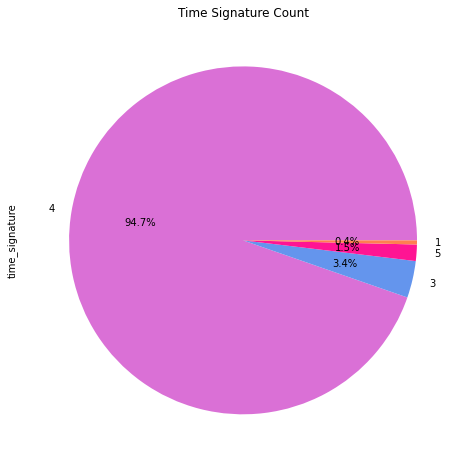

In [104]:
time_signature_count = tiktok_songs['time_signature'].value_counts()
time_signature_count.plot(kind='pie', title='Time Signature Count', colors=['orchid', 'cornflowerblue', 'deeppink','coral'], autopct='%1.1f%%', figsize=(8,8))

<AxesSubplot:title={'center':'Key Count'}, ylabel='key'>

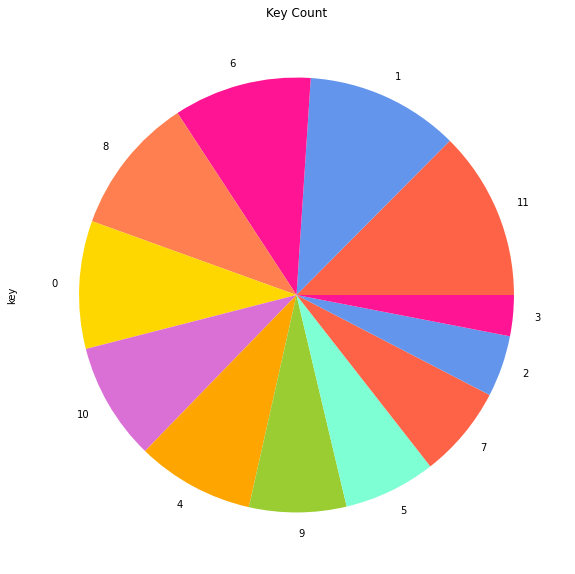

In [98]:
time_signature_count = tiktok_songs['key'].value_counts()
time_signature_count.plot(kind='pie', title='Key Count', colors=['tomato', 'cornflowerblue', 'deeppink','coral', 'gold', 'orchid', 'orange', 'yellowgreen', 'aquamarine'])


<AxesSubplot:title={'center':'Major or Minor'}, xlabel='Key', ylabel='Count'>

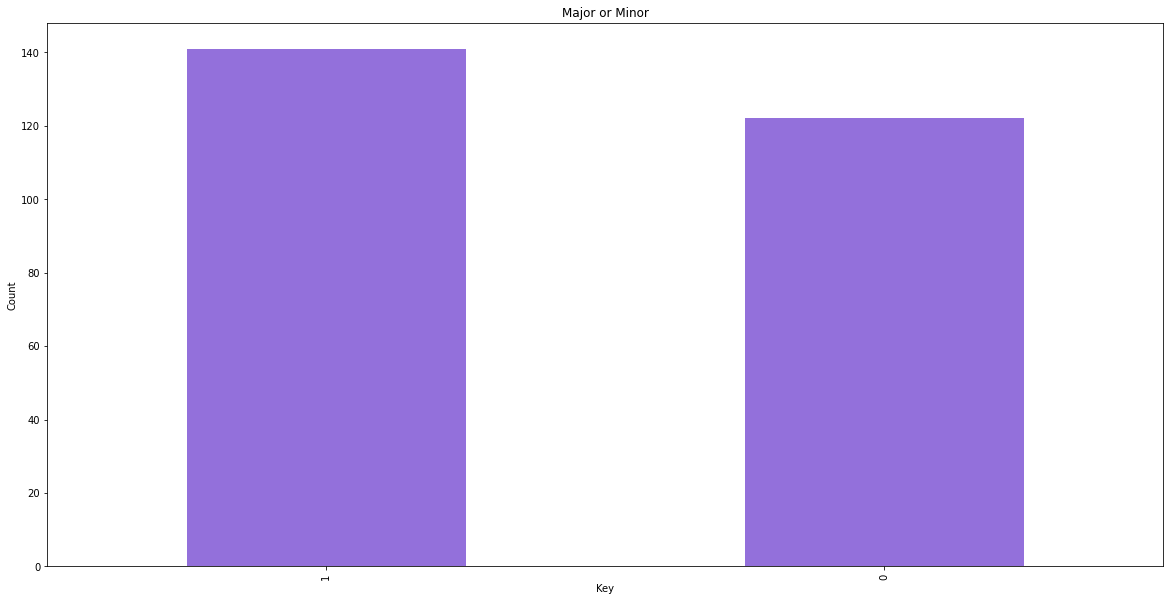

In [76]:
time_signature_count = tiktok_songs['mode'].value_counts()
time_signature_count.plot(kind='bar', title='Major or Minor', xlabel='Key', ylabel='Count', color='mediumpurple')

## Look into the top 250 Most Followed on Tiktok

In [108]:
filepath = 'tiktok-data/top-250-tiktokers.csv'
tiktokers = pd.read_csv(filepath)
print("done")
tiktokers.head()

done


,Rank,Username,Country,Followers,Views,Likes,Engagement,Brand Account,Gender,Age,Ethnicity,Famous,Genre,LGBTQ
0,1,@charlidamelio,U.S.A,78.9m,38.3m,6.1m,16.60%,0,Female,16.0,White,0.0,"Dancing, Lipsyncing, Lifestyle",0.0
1,2,@addisonre,U.S.A,53.7m,13.8m,2.8m,20.80%,0,Female,19.0,White,0.0,"Dancing, Lipsyncing",0.0
2,3,@zachking,U.S.A,47.3m,17.6m,2.8m,16%,0,Male,30.0,East Asian,1.0,"Comedy, Illusion",0.0
3,4,@lorengray,U.S.A,46.3m,3.2m,622.6k,19.70%,0,Female,18.0,White,1.0,"Dancing, Lipsyncing",0.0
4,5,@tiktok,U.S.A,45.3m,9.4m,503.0k,5.60%,1,NaN,NaN,NaN,1.0,NaN,NaN


Text(0, 0.5, 'Count')

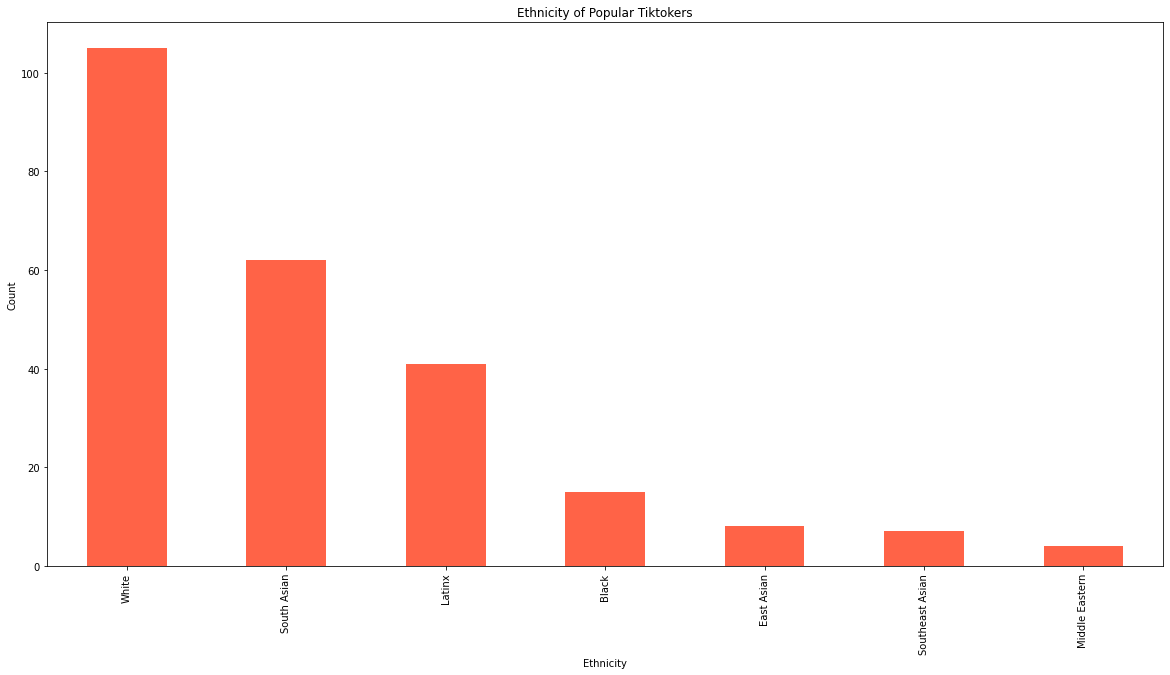

In [121]:
# show ethnicity graph
ethnicity_count = tiktokers['Ethnicity'].value_counts()
ethnicity_count.plot(kind='bar', color=['tomato'])
plt.title('Ethnicity of Popular Tiktokers')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

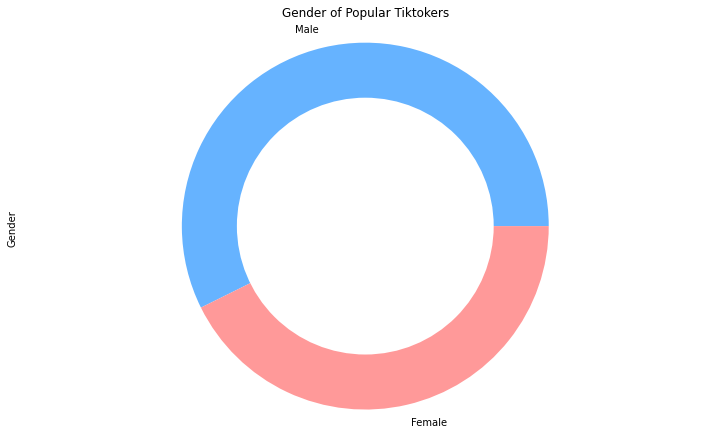

In [170]:
# male to female ratio
gender = tiktokers['Gender'].value_counts()
gender.plot(kind='pie', colors=['#66b3ff','#ff9999'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.title('Gender of Popular Tiktokers')
plt.show()

## How old are popular Tiktokers?
- The most followed Tiktokers are clustered in the early 20s age range as shown in the graph
- This reflects the popularity of Tiktok as a social media platform ***

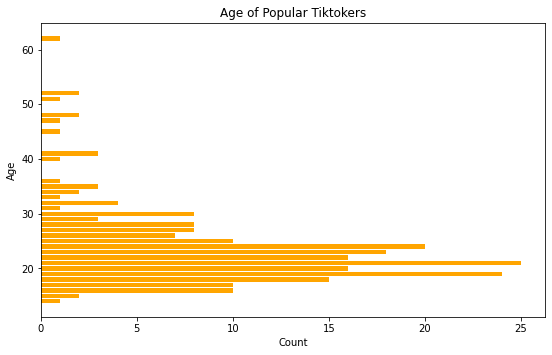

Average age of popular tiktokers:  23.817777777777778
Median age of popular tiktokers:  22.0


In [175]:
age = tiktokers['Age'].value_counts()
age = age.sort_index()
plt.barh(age.index, age.values, color=['orange'])
plt.title('Age of Popular Tiktokers')
plt.xlabel('Count')
plt.ylabel('Age')
plt.subplots_adjust(bottom=0.2)
plt.gcf().subplots_adjust(left=0.2)
plt.show()

print('Average age of popular tiktokers: ', tiktokers['Age'].mean())
print('Median age of popular tiktokers: ', tiktokers['Age'].median())